In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt #for plotting output
import IPython.display #for audio output
import librosa #for audio 
import math
from collections import Counter
import librosa.display #for visualisation
%matplotlib inline 

#http://ibeat.org/piano-chords-free/
#http://biblio.telecom-paristech.fr/cgi-bin/download.cgi?id=10050
#https://hal.archives-ouvertes.fr/hal-00656352/document
#http://www.nyu.edu/classes/bello/MIR_files/tonality.pdf

In [122]:
#Load file for chord detection
audio_sample = '/home/student/data/cs4065/demo/Samples/Metal.mp3'
audio_sample_y, audio_sample_sr = librosa.load(audio_sample)
y_harmonic, y_percussive = librosa.effects.hpss(audio_sample_y)

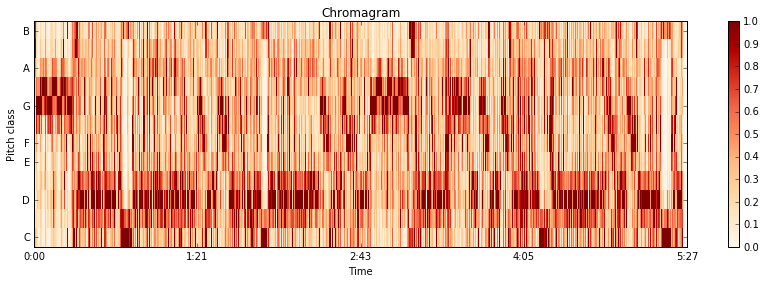

In [123]:
audio_sample_chroma = librosa.feature.chroma_cqt(y=y_harmonic, sr=audio_sample_sr)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the chromagram
librosa.display.specshow(audio_sample_chroma, sr=audio_sample_sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
plt.title('Chromagram')
plt.colorbar()

plt.tight_layout()

In [120]:
#Extract chroma per number of seconds 
duration = librosa.get_duration(y=audio_sample_y, sr=audio_sample_sr)
nseconds = int(duration) #int(duration) for whole number or any integer for n seconds
chroma_trans = np.transpose(audio_sample_chroma) #transpose chroma
nsamples = int(math.floor(chroma_trans.shape[0]/duration))*nseconds #number of samples per 'nseconds' seconds
nperiods = int(math.floor(chroma_trans.shape[0]/nsamples)) #number of periods of 'nseconds' seconds
pstart = 0 #start of the period 
pend = pstart + nsamples
periods = np.zeros((nperiods, nsamples, 12))
period_averages = np.zeros((nperiods, 12))
for i in range(0, nperiods):
    if (pend <= chroma_trans.shape[0]):
        periods[i] = chroma_trans[pstart:pend]
    else:
        length = nsamples-(pend-chroma_trans.shape[0])
        print(length)
        periods[i, 0:length] = chroma_trans[pstart:pend]
    period_averages[i] = np.array([sum(a)/len(a) for a in zip(*periods[i])])
    pstart = pend+1
    pend = pstart+nsamples


In [77]:
keys = [{'name': 'C-maj', 'scale': ['A', 'B', 'C', 'D', 'E', 'F', 'G']},
        
          {'name': 'G-maj', 'scale': ['A', 'B', 'C', 'D', 'E', 'F#/Gb', 'G']},
          {'name': 'F-maj', 'scale': ['A', 'A#/Bb', 'C', 'D', 'E', 'F', 'G']},
        
          {'name': 'D-maj', 'scale': ['A', 'B', 'C#/Db', 'D', 'E', 'F#/Gb', 'G']},
          {'name': 'Bb-maj', 'scale': ['A', 'A#/Bb', 'C', 'D', 'D#/Eb', 'F', 'G']},
        
          {'name': 'A-maj', 'scale': ['A', 'B', 'C#/Db', 'D', 'E', 'F#/Gb', 'G#/Ab']},
          {'name': 'Eb-maj', 'scale': ['G#/Ab', 'A#/Bb', 'C', 'D', 'D#/Eb', 'F', 'G']},
        
          {'name': 'E-maj', 'scale': ['E', 'F#/Gb', 'G#/Ab', 'A', 'B', 'C#/Db', 'D#/Eb']},
          {'name': 'Ab-maj', 'scale': ['G#/Ab', 'A#/Bb', 'C', 'C#/Db', 'D#/Eb', 'F', 'G']},
        
          {'name': 'B-maj', 'scale': ['B', 'C#/Db', 'D#/Eb', 'F', 'F#/Gb', 'G#/Ab', 'A#/Bb']},
          {'name': 'C#-maj', 'scale': ['C#/Db', 'D#/Eb', 'F', 'F#/Gb', 'G#/Ab', 'A#/Bb', 'C']},
        
          {'name': 'F#-maj', 'scale': ['F#/Gb', 'G#/Ab', 'A#/Bb', 'B', 'C#/Db', 'D#/Eb', 'F']}
         ]

In [78]:
def NoteToNumber(note):
    if note == 'C':
        return 0
    elif note == 'C#/Db':
        return 1
    elif note == 'D':
        return 2
    elif note == 'D#/Eb':
        return 3
    elif note == 'E':
        return 4
    elif note == 'F':
        return 5
    elif note == 'F#/Gb':
        return 6
    elif note == 'G':
        return 7
    elif note == 'G#/Ab':
        return 8
    elif note == 'A':
        return 9
    elif note == 'A#/Bb':
        return 10
    elif note == 'B':
        return 11

In [124]:
chroma = np.transpose(audio_sample_chroma)

results = []
for slice in periods:
    #count notes with intensity > 0.9 
    counts = np.zeros((12))
    for sample in slice: 
        for note in ['C', 'C#/Db', 'D', 'D#/Eb', 'E', 'F', 'F#/Gb', 'G', 'G#/Ab', 'A', 'A#/Bb', 'B']:
            intensity = sample[NoteToNumber(note)]
            if intensity > 0.9:
                counts[NoteToNumber(note)] += 1
    #find key
    print(counts)
    best_score = -100
    best_key = {'name': 'C-maj', 'scale': ['A', 'B', 'C', 'D', 'E', 'F', 'G']}
    
    for key in keys:
        score = 0
        for note in ['C', 'C#/Db', 'D', 'D#/Eb', 'E', 'F', 'F#/Gb', 'G', 'G#/Ab', 'A', 'A#/Bb', 'B']:
            occurrences = counts[NoteToNumber(note)]
            if note in key['scale']:
                score += occurrences

        if score > best_score:
            best_score = score
            best_key = key
    results += {best_key['name']}
    print(best_key['name'])
    
Counter(results).most_common()

[ 1061.   132.    91.    92.   402.   524.  1643.  6023.  2030.  1028.
   952.  3018.]
G-maj


[('G-maj', 1)]